In [7]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.DataFrame([['green','M','10.1','class1'],
                  ['red','L','13.5','class2'],
                 ['blue','XL','15.3','class1']]) 
df.columns = ['color','size','price','classlabel']

In [3]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [4]:
#encoding size column
size_mapping = {'XL':3, 'L':2,'M':1} 
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [5]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [10]:
#encoding class labels 
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [12]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [13]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [15]:
# wine dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
from sklearn.model_selection import train_test_split  

In [24]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [21]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [28]:
#Standardization 
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [30]:
#selecting meaningful features 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(penalty='l1',C=1.0)
lr.fit(X_train_std,y_train)
print('Training accuracy:',lr.score(X_train_std,y_train))
print('Testing accuracy:',lr.score(X_test_std,y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/krish.mahajan@ibm.com/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
lr.intercept_

array([-1.26351182, -1.21587608, -2.37097267])

In [32]:
lr.coef_

array([[ 1.24635329,  0.18143683,  0.74163668, -1.15980001,  0.        ,
         0.        ,  1.18087664,  0.        ,  0.        ,  0.        ,
         0.        ,  0.53836615,  2.51173214],
       [-1.53676406, -0.38754503, -0.99530143,  0.36502276, -0.05977879,
         0.        ,  0.66810809,  0.        ,  0.        , -1.9343003 ,
         1.23323043,  0.        , -2.23181634],
       [ 0.13506904,  0.17008109,  0.35715584,  0.        ,  0.        ,
         0.        , -2.43429157,  0.        ,  0.        ,  1.56268278,
        -0.81730158, -0.49655448,  0.        ]])

In [35]:
dim

13

<class 'range'>


In [42]:
from itertools import combinations
dim = X_train.shape[1]
indices_ = tuple(range(dim))
for p in combinations(indices_ , r = dim - 1) :
    print(p)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


In [59]:
import sys
from SBS import SBS
import importlib
importlib.reload(sys.modules["SBS"])

<module 'SBS' from '/Users/krish.mahajan@ibm.com/Desktop/Documents_Desktop/Github/Python-Codes/Python-Codes.PythonMachineLearning.chap2/chap4/SBS.py'>

In [60]:
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std, y_train)

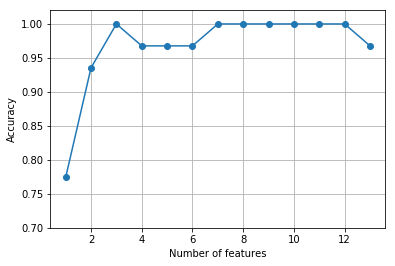

In [62]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [63]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

In [64]:
sbs.scores_

[0.967741935483871,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 1.0,
 0.9354838709677419,
 0.7741935483870968]

In [ ]:
¬